<a href="https://colab.research.google.com/github/gkarlwalker/NYU/blob/main/Assignments/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#If opening in colab run this cell
!git clone https://github.com/connordouglas10/DS-Tech-2025January.git
%cd DS-Tech-2025January/Assignments

Cloning into 'DS-Tech-2025January'...
remote: Enumerating objects: 337, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 337 (delta 6), reused 14 (delta 6), pack-reused 321 (from 1)
Receiving objects: 100% (337/337), 97.09 MiB | 24.33 MiB/s, done.
Resolving deltas: 100% (97/97), done.
/content/DS-Tech-2025January/Assignments


# IF OPENING IN COLAB, REMEMBER TO SAVE THIS NOTEBOOK TO GOOGLE DRIVE!

# Predicting Customer Complaints

Our problem setting is similar that which we saw in class. You've been hired by Trans American Airlines (TAA) as a data science consultant. Your job is to identify customer service issues in tweets, so the issues can be directed to the customer experience team.

We will be trying a variety of text representation techniques and modeling approaches to see which work the best.

In [7]:
# Import the libraries we will be using
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pylab as plt
%matplotlib inline

__1. Load the data. Print a portion of the DataFrame.__

In [8]:
import numpy as np
import pandas as pd

# If necessary change the path below so that it points to your file.
data_path = "./data/data-hw4.csv"

df = pd.read_csv(data_path)

df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,name,retweet_count,text,tweet_created,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,cairdin,0,@TAA What @dhepburn said.,2/24/2015 11:35,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,jnardino,0,@TAA plus you've added commercials to the expe...,2/24/2015 11:15,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,yvonnalynn,0,@TAA I didn't today... Must mean I need to tak...,2/24/2015 11:15,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,jnardino,0,@TAA it's really aggressive to blast obnoxious...,2/24/2015 11:15,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,jnardino,0,@TAA and it's a really big bad thing about it,2/24/2015 11:14,Pacific Time (US & Canada)


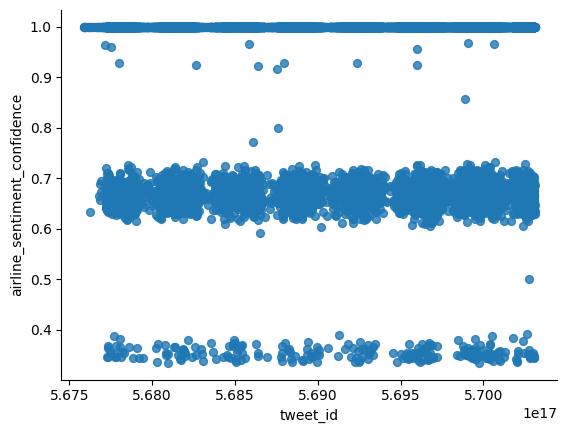

In [9]:
# @title tweet_id vs airline_sentiment_confidence

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='tweet_id', y='airline_sentiment_confidence', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

__2. Define a binary target variable for "Customer Service Issue". Keep only this binary target variable and the text in the DataFrame. What portion of tweets are about a customer service issue?__

In [11]:
# prompt: Define a binary target variable for "Customer Service Issue". Keep only this binary target variable and the text in the DataFrame. What portion of tweets are about a customer service issue?

import numpy as np
import pandas as pd
#If opening in colab run this cell
# !git clone https://github.com/connordouglas10/DS-Tech-2025January.git
# %cd DS-Tech-2025January/Assignments
# # IF OPENING IN COLAB, REMEMBER TO SAVE THIS NOTEBOOK TO GOOGLE DRIVE!

# Assuming the data is already loaded in df (from previous code block)
# data_path = "./data/data-hw4.csv"
# df = pd.read_csv(data_path)


# Create the binary target variable
df['Customer Service Issue'] = np.where(df['airline_sentiment'] == 'negative', 1, 0)

# Keep only the binary target variable and the text
df = df[['Customer Service Issue', 'text']]

# Calculate the portion of tweets about customer service issues
portion_customer_service_issues = df['Customer Service Issue'].mean()

print(f"The portion of tweets about customer service issues is: {portion_customer_service_issues}")


The portion of tweets about customer service issues is: 0.6269125683060109


__3. To make things technically easier, we will not do cross-validation on this assignment. Instead, split the data into 80% training data, 20% test data. Then, split the train set into 80% sub-train, 20% validation data.__

In [12]:
# prompt: To make things technically easier, we will not do cross-validation on this assignment. Instead, split the data into 80% training data, 20% test data. Then, split the train set into 80% sub-train, 20% validation data.

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['Customer Service Issue'], test_size=0.2, random_state=42
)

# Split the training set into sub-training and validation sets
X_subtrain, X_val, y_subtrain, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

print("Shapes of the datasets:")
print("X_subtrain:", X_subtrain.shape)
print("X_val:", X_val.shape)
print("X_test:", X_test.shape)
print("y_subtrain:", y_subtrain.shape)
print("y_val:", y_val.shape)
print("y_test:", y_test.shape)

Shapes of the datasets:
X_subtrain: (9369,)
X_val: (2343,)
X_test: (2928,)
y_subtrain: (9369,)
y_val: (2343,)
y_test: (2928,)


__4. Create and train a binary vector representation along with a TF-IDF representation of the words in each tweet. Then, use apply these vectorizors to create two representations of the training and validation set.__

In [13]:
# prompt: Create and train a binary vector representation along with a TF-IDF representation of the words in each tweet. Then, use apply these vectorizors to create two representations of the training and validation set.

# Create and train a binary vectorizer
binary_vectorizer = CountVectorizer(binary=True)
X_subtrain_binary = binary_vectorizer.fit_transform(X_subtrain)
X_val_binary = binary_vectorizer.transform(X_val)
X_test_binary = binary_vectorizer.transform(X_test)

# Create and train a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_subtrain_tfidf = tfidf_vectorizer.fit_transform(X_subtrain)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Shapes of the binary vectorized datasets:")
print("X_subtrain_binary:", X_subtrain_binary.shape)
print("X_val_binary:", X_val_binary.shape)
print("X_test_binary:", X_test_binary.shape)

print("\nShapes of the TF-IDF vectorized datasets:")
print("X_subtrain_tfidf:", X_subtrain_tfidf.shape)
print("X_val_tfidf:", X_val_tfidf.shape)
print("X_test_tfidf:", X_test_tfidf.shape)

Shapes of the binary vectorized datasets:
X_subtrain_binary: (9369, 11697)
X_val_binary: (2343, 11697)
X_test_binary: (2928, 11697)

Shapes of the TF-IDF vectorized datasets:
X_subtrain_tfidf: (9369, 11697)
X_val_tfidf: (2343, 11697)
X_test_tfidf: (2928, 11697)


__5. Build 2 logistic regression models, one for each representation. For each of these, try different values for the hyperparameter C.__

Try to optimize generalization performance, evaluated based on ROC Area on the validation set. Try looping over values of C for each model; in this loop train and evaluate + print the AUC. Report the best hyperparameter you found for the model for each representation (binary and TFIDF). Pick one model to move forward with for each representation Why did you select this one?



In [14]:
# prompt: Build 2 logistic regression models, one for each representation. For each of these, try different values for the hyperparameter C.
# Try to optimize generalization performance, evaluated based on ROC Area on the validation set. Try looping over values of C for each model; in this loop train and evaluate + print the AUC. Report the best hyperparameter you found for the model for each representation (binary and TFIDF). Pick one model to move forward with for each representation Why did you select this one?

# Hyperparameter tuning for Logistic Regression models

# Define the range of C values to try
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Initialize variables to store the best hyperparameters and AUCs
best_C_binary = None
best_auc_binary = 0
best_model_binary = None

best_C_tfidf = None
best_auc_tfidf = 0
best_model_tfidf = None

# Loop over C values for the binary representation
for C in C_values:
    model_binary = LogisticRegression(C=C, solver='liblinear')  # Use liblinear for smaller datasets
    model_binary.fit(X_subtrain_binary, y_subtrain)
    y_pred_prob_binary = model_binary.predict_proba(X_val_binary)[:, 1]
    auc_binary = metrics.roc_auc_score(y_val, y_pred_prob_binary)
    print(f"Binary model, C={C}: AUC = {auc_binary}")

    if auc_binary > best_auc_binary:
        best_auc_binary = auc_binary
        best_C_binary = C
        best_model_binary = model_binary

# Loop over C values for the TF-IDF representation
for C in C_values:
    model_tfidf = LogisticRegression(C=C, solver='liblinear')
    model_tfidf.fit(X_subtrain_tfidf, y_subtrain)
    y_pred_prob_tfidf = model_tfidf.predict_proba(X_val_tfidf)[:, 1]
    auc_tfidf = metrics.roc_auc_score(y_val, y_pred_prob_tfidf)
    print(f"TF-IDF model, C={C}: AUC = {auc_tfidf}")

    if auc_tfidf > best_auc_tfidf:
        best_auc_tfidf = auc_tfidf
        best_C_tfidf = C
        best_model_tfidf = model_tfidf

print(f"\nBest hyperparameters:")
print(f"Binary: C = {best_C_binary}, AUC = {best_auc_binary}")
print(f"TF-IDF: C = {best_C_tfidf}, AUC = {best_auc_tfidf}")

print("\nSelected models:")
print(f"Binary: The model with C = {best_C_binary} was selected because it achieved the highest AUC on the validation set.")
print(f"TF-IDF: The model with C = {best_C_tfidf} was selected because it achieved the highest AUC on the validation set.")

Binary model, C=0.001: AUC = 0.811776379937327
Binary model, C=0.01: AUC = 0.8648949984362446
Binary model, C=0.1: AUC = 0.8986084878180403
Binary model, C=1: AUC = 0.9055756305612961
Binary model, C=10: AUC = 0.8929260773046992
Binary model, C=100: AUC = 0.8740935585549674
TF-IDF model, C=0.001: AUC = 0.8304739864719842
TF-IDF model, C=0.01: AUC = 0.8459382991249104
TF-IDF model, C=0.1: AUC = 0.8753767576915295
TF-IDF model, C=1: AUC = 0.9039996105942882
TF-IDF model, C=10: AUC = 0.9063628739981235
TF-IDF model, C=100: AUC = 0.8902033035095573

Best hyperparameters:
Binary: C = 1, AUC = 0.9055756305612961
TF-IDF: C = 10, AUC = 0.9063628739981235

Selected models:
Binary: The model with C = 1 was selected because it achieved the highest AUC on the validation set.
TF-IDF: The model with C = 10 was selected because it achieved the highest AUC on the validation set.


__6. We will now try using a transformer embedding representations of text. This helps to capture the sequential dependencies of the text. The SentenceTransformers library enables easy embedding representations. Embed the training, validation, and test sets and store under a new variable name. We've started you with the training set. Print the dimensionality of the embeddings (using X_train_embeddings.shape[1]).__

This might take a bit of time!

In [16]:
# Install the necessary library
!pip install -q sentence-transformers

In [17]:
# Import the SentenceTransformer class
from sentence_transformers import SentenceTransformer

# Load a pre-trained SentenceTransformer model
# You can choose a model like 'all-MiniLM-L6-v2', 'paraphrase-MiniLM-L3-v2', etc.
model_name = 'all-MiniLM-L6-v2'
model = SentenceTransformer(model_name)

# Compute embeddings for the training set with model.encode
X_train_embeddings = model.encode(X_train.to_numpy())

# Display the embeddings
print("Embeddings shape:", X_train_embeddings.shape)
print("Example embedding for the first sentence:", X_train_embeddings[0])

# prompt: We will now try using a transformer embedding representations of text. This helps to capture the sequential dependencies of the text. The SentenceTransformers library enables easy embedding representations. Embed the training, validation, and test sets and store under a new variable name. We've started you with the training set. Print the dimensionality of the embeddings (using X_train_embeddings.shape[1]).

!pip install sentence-transformers

from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-mpnet-base-v2')

X_train_embeddings = model.encode(X_train.tolist())
X_val_embeddings = model.encode(X_val.tolist())
X_test_embeddings = model.encode(X_test.tolist())

X_train_embeddings.shape[1]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Embeddings shape: (11712, 384)
Example embedding for the first sentence: [ 9.53563377e-02 -4.09132987e-02  1.82114504e-02  3.16176228e-02
 -6.09968752e-02 -2.78543085e-02  3.91240045e-02 -4.97867074e-03
  2.19763014e-02  1.12229381e-02 -3.21693532e-02 -9.00165364e-02
  5.13599813e-02  5.73693216e-03  1.37226749e-02  4.34203260e-02
 -2.37063225e-02 -3.82463299e-02  1.00898426e-02 -9.21551045e-03
 -3.07020941e-03  1.60129797e-02  1.05588175e-02 -2.28698063e-03
 -1.35177504e-02 -4.63443696e-02 -5.46867065e-02  1.73034519e-02
 -9.04654153e-03 -7.87028372e-02  3.06875035e-02  6.30696341e-02
  3.04401666e-02  1.57544389e-02  1.49376720e-01  3.73066254e-02
 -8.75616223e-02 -4.28721718e-02  1.50433239e-02  3.51217464e-02
  6.68078574e-05  1.24704465e-02 -2.99829170e-02 -2.54025534e-02
 -7.33638704e-02  3.54726911e-02 -5.41015752e-02 -3.03078089e-02
  5.52393757e-02  1.35399308e-02  2.86263134e-02  1.02466747e-01
 -1.16784242e-03  4.92366590e-02  2.30882154e-03 -2.78428663e-03
 -5.70159517e-02 

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

768

__7. Build a logistic regression model using this new embedding representation as the features. Try different values for the hyperparameter C.__

Try to optimize generalization performance, evaluated based on ROC Area on the validation set. Report the best hyperparameter you found. Pick one model to move forward with. Why did you select this one?

In [ ]:
#Your code goes here

__8. Now, we will do a similar process for training a neural network. Try two other set-ups, then train and evaluate each set-up on the validation set. Try adding a layer, changing the width of internal (hidden) layers (i.e. not input or output layers), or changing the number of epochs. Report the AUC of each set-up.__

__HINT: There is an example below of one architecture. Evaluate this performance with AUC on the validation set, then repeat this two more times with different network shapes.__

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Example input size (number of features from X_train_embeddings.shape[0])
input_size = X_train_embeddings.shape[1]  # Replace with your actual input dimension

# Define a simple neural network model
model = models.Sequential([
    layers.Input(shape=(input_size,)),  # Input layer
    layers.Dense(128, activation='relu'),  # Hidden layer with ReLU activation
    layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Train the model

model.fit(X_train_embeddings, y_train, epochs=10, validation_data=(X_val_embeddings, y_val))

print("Training complete!")

# Your code goes here

__9. Display one ROC curve and AUC figures for the following on the validation set. Plot all curves on a single graph:__
* The best logistic regression model using a binary representation
* The best logistic regression model using a TF-IDF representation
* The best logistic regression model using a SentenceTransformers embedding representation
* The best neural network using a SentenceTransformers embedding representation

You may need to copy code from various sections above to retrain each model on the best hyperparameter.


In [ ]:
#Your code goes here

__10. Pick the best option from above, and graph the ROC curve with the AUC on our test set.__


In [ ]:
#Your code goes here